<h2><center>The Captone Project - Battle of the neigborhoods <br \> <br \> Applied Data Science Capstone Course By Coursera</center></h2>

<h2><center> Identifying areas for real-estate investment </center></h2>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology and Analysis](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Real-estate is one of the fastest growing markets in the United States today. The residential housing market has seen unprecendented growth in the last year, fuelled by the demands caused by pandemic (people opting to work from home, moving to cheaper cities etc). As the residential real estate market grows, commercial real estate market follows suit. The upcoming housing communities need supporting commercial establishments such as coffee shops, restaurants, office spaces, preschools etc around them. Therefore, this market presents a great avenue to invest and grow for someone who is looking for oppurtunies in real-estate market. However, these investors, indivduals or a company might not be physcially present at these locations to know where such opportunities exist. Usually, either they spend a lot of time exploring the areas on their own or send a real-estate agent to these locations. Both of which are time consuming and expensive affairs. In this project, I aim to present a data driven analysis to identify the upcoming communities and the commercial establishments around them. The goal of this project is to give a bird's eye view of the geographical location that also shows the areas with potential to grow. Using the Foursquare API I also give an idea of what commercial establishements are already in operation to further narrow down the investment opportunities.  

## Data <a name="data"></a>

For this study I picked Williamson county in Texas, which is the third fastest growing county in Texas. I did not want to pick the top most counties as those counties would already have seen enough growth. The idea is to pick the ones that have the most growth potential for the investment. Further,I looked at the fastest growing cities in Williamson county, this information is obtained from wikipedia. I used Beautiful soup to scrape wikipedia and get the information of top 5 largest cities in Williamson County. The information was from 2018 and the present day numbers might be higher. Again to ensure highest growth potential opportunites, I left the top 2 cities and picked the thrid largest city 'Georgetown' for this study. Next step was to look at where new housing communities were coming up in Georgetown.This information was obtained from Williamson county website, it had names and addresses of the communities. Once I had the addresses, I cleeaned them and used google API to obtain the location coordinates for those addresses. As the last step in "Data", I used the address coordinates in Foursqaure API to obtain the venues around them and to further explore the Georgetown city.      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 

#### Fastest Growing cities in Williamson County, Texas

In [2]:
url = "https://en.wikipedia.org/wiki/Williamson_County,_Texas"
html_data = requests.get(url).text

In [3]:
soup = BeautifulSoup(html_data, 'html5lib')

In [4]:
title = soup.title

In [5]:
header = soup.find("b", text="Municipal Population History")
table= header.find_parent("table")

In [6]:
table_contents = []
for row in table.find_all("tr")[2:] :
    data = {}
    data = [cell.get_text(strip=True) for cell in row.find_all("td")]
    table_contents.append(data)

In [7]:
rows = table.find_all('tr')[:2]
heading = []
for row in rows :
    hdng = [text.get_text(strip=True) for text in row.find_all("th")]
    heading = hdng

In [8]:
counties = pd.DataFrame(table_contents, columns = heading)
counties = counties.set_index('#')
counties.head()

,Largest Cities in Williamson County,1950,1960,1970,1980,1990,2000,2010,2018 (estimate)
#,,,,,,,,,
1,Round Rock,"1,438","1,878","2,811","11,812","30,923","61,136","99,887","128,739"
2,Cedar Park,202,385,692,"3,474","5,161","26,049","48,937","76,999"
3,Georgetown,"4,951","5,218","6,395","9,468","14,842","28,339","47,400","74,180"
4,Leander,-,-,-,"2,179","3,398","7,596","26,521","56,111"
5,Hutto,n/a,400,545,659,630,"1,250","14,698","26,434"


#### New home communities in Georgetown Texas

In [9]:
url1 = "https://wclife.org/new-home-communities/cities/georgetown"
url2 = "https://wclife.org/new-home-communities/cities/georgetown/P10"
html_data1 = requests.get(url1).text
html_data2 = requests.get(url2).text

In [10]:
soup1 = BeautifulSoup(html_data1, 'html5lib')
soup2 = BeautifulSoup(html_data2, 'html5lib')

#### Extracting the community names 

In [11]:
comms1 = []
for h in soup1.find_all('h2'): 
    txt = h.get_text()
    comms1.append(txt)
    
comms1 = comms1[1:-1]
comms2 = []
for h in soup2.find_all('h2'):
    txt = h.get_text()
    comms2.append(txt)
comms2 = comms2[1:-1]

In [12]:
comms = comms1 + comms2

In [13]:
print(comms)
len(comms)

['Berry Creek', 'Carlson Place', 'Cimarron Hills', 'Deer Haven', 'Georgetown Village', 'La Conterra', 'Lakeside at Lake Georgetown', 'MorningStar', 'Oaks at San Gabriel', 'Parkside at Mayfield Ranch', 'Rancho Sienna', 'SaddleCreek', 'Sun City Texas', 'Teravista by Newland Communities', 'The Brownstone at the Summit', 'Water Oak', 'Wolf Ranch', 'Woodland Park']


18

#### Extracting the community addresses

In [14]:
addrs1 = []
for p in soup1.select("p:nth-of-type(1)"):
    txt = p.get_text()
    addrs1.append(txt)
addrs1 = addrs1[0:-2]
print(addrs1)
addrs2 = []
for p in soup2.select("p:nth-of-type(1)"):
    txt = p.get_text()
    addrs2.append(txt)
addrs2 = addrs2[0:-2]
print(addrs2)

[' 30325 Tiger Woods Dr.  | Georgetown, TX  78628', ' Rockride Lane and Carlson Cove  | Georgetown, TX  78626', ' 307 Flint Ridge Trail  | Georgetown, TX  78628', ' 3816 Williams Drive  | Georgetown, TX  78633', ' Shell Road  | Georgetown, TX  78626', ' 358 Grand Junction Trl  | Georgetown, TX  78626', ' 113 Lake Spring Circle  | Georgetown, TX  78628', ' 101 Ridgeview Court  | Georgetown, TX  78628', ' 1211 Terrace Drive  | Georgetown, TX  78628', ' 101 Garner Park Cove  | Georgetown, TX  78628']
[' 404 Via De Sienna Blvd  | Georgetown, TX  78628', ' 8605 Daisy Cutter Crossing  | Georgetown, TX  78626', ' 1501 Sun City Blvd  | Georgetown, TX  78633', ' 1000 Wildflower Park Drive  | Georgetown, TX  78626', ' 204 Adams St  | Georgetown, TX  78628', ' 2609 Water Oak Parkway  | Georgetown, TX  78628', ' Wolf Ranch Parkway  | Georgetown, TX  78626', ' 101 W. Red Bud Meadow  | Georgetown, TX  78633']


In [15]:
addrs = addrs1+addrs2
len(addrs)

18

In [16]:
print(addrs)

[' 30325 Tiger Woods Dr.  | Georgetown, TX  78628', ' Rockride Lane and Carlson Cove  | Georgetown, TX  78626', ' 307 Flint Ridge Trail  | Georgetown, TX  78628', ' 3816 Williams Drive  | Georgetown, TX  78633', ' Shell Road  | Georgetown, TX  78626', ' 358 Grand Junction Trl  | Georgetown, TX  78626', ' 113 Lake Spring Circle  | Georgetown, TX  78628', ' 101 Ridgeview Court  | Georgetown, TX  78628', ' 1211 Terrace Drive  | Georgetown, TX  78628', ' 101 Garner Park Cove  | Georgetown, TX  78628', ' 404 Via De Sienna Blvd  | Georgetown, TX  78628', ' 8605 Daisy Cutter Crossing  | Georgetown, TX  78626', ' 1501 Sun City Blvd  | Georgetown, TX  78633', ' 1000 Wildflower Park Drive  | Georgetown, TX  78626', ' 204 Adams St  | Georgetown, TX  78628', ' 2609 Water Oak Parkway  | Georgetown, TX  78628', ' Wolf Ranch Parkway  | Georgetown, TX  78626', ' 101 W. Red Bud Meadow  | Georgetown, TX  78633']


In [17]:
# A dataframe of communities with corresponding addresses
ggtwn = {'Communities': comms, 'Address':addrs}
com_ggtwn = pd.DataFrame(ggtwn, columns = ['Communities', 'Address'])

In [18]:
com_ggtwn.head()

,Communities,Address
0,Berry Creek,"30325 Tiger Woods Dr. | Georgetown, TX 78628"
1,Carlson Place,"Rockride Lane and Carlson Cove | Georgetown,..."
2,Cimarron Hills,"307 Flint Ridge Trail | Georgetown, TX 78628"
3,Deer Haven,"3816 Williams Drive | Georgetown, TX 78633"
4,Georgetown Village,"Shell Road | Georgetown, TX 78626"


#### Obtaining the coordinates of the Neighborhood addresses

In [19]:
import re
import folium
from folium.features import DivIcon

In [20]:
# The code was removed by Watson Studio for sharing.

In [21]:
def get_coords(api_key, address, verbose=False):
    try:
        url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
        response = requests.get(url).json()
        if verbose:
            print('Google Maps API JSON result =>', response)
        results = response['results']
        geographical_data = results[0]['geometry']['location'] # get geographical coordinates
        lat = geographical_data['lat']
        lon = geographical_data['lng']
        return [lat, lon]
    except:
        return [None, None]
    
address = 'Georgetown, Texas, USA'
ggtwn = get_coords(api_key, address)
print('Coordinate of {}: {}'.format(address, ggtwn))

Coordinate of Georgetown, Texas, USA: [30.6332618, -97.6779842]


In [22]:
# cleaning the addresses 
cleanaddrs = []
for a in addrs:
    ca = a.replace('|', ',')
    cleanaddrs.append(ca)

In [23]:
# obtaining the coordinates using google API
lat = []
lon = []
loc = []

for a in cleanaddrs :
    l = get_coords(api_key, a)
    loc.append(l)
    lat.append(l[0])
    lon.append(l[1])

In [24]:
print(loc)

[[30.7144059, -97.66470869999999], [30.621265, -97.644688], [30.6523577, -97.7912765], [30.6729895, -97.7014293], [30.7122562, -97.68587579999999], [30.599753, -97.65625209999999], [30.6899687, -97.7290086], [30.64828319999999, -97.81913019999999], [30.6410107, -97.76340189999999], [30.5762202, -97.7716166], [30.62622959999999, -97.8184823], [30.618414, -97.6353695], [30.7165271, -97.7211944], [30.5902212, -97.66370380000001], [30.6516196, -97.68659670000001], [30.6307418, -97.7524717], [30.6372296, -97.7005088], [30.7105922, -97.7577561]]


In [25]:
len(loc)

18

In [26]:
# updated dataframe with latitude and longitude information
com_ggtwn['Address'] = cleanaddrs
com_ggtwn['latitude']= lat
com_ggtwn['longitude']=lon

In [27]:
com_ggtwn

,Communities,Address,latitude,longitude
0,Berry Creek,"30325 Tiger Woods Dr. , Georgetown, TX 78628",30.714406,-97.664709
1,Carlson Place,"Rockride Lane and Carlson Cove , Georgetown,...",30.621265,-97.644688
2,Cimarron Hills,"307 Flint Ridge Trail , Georgetown, TX 78628",30.652358,-97.791276
3,Deer Haven,"3816 Williams Drive , Georgetown, TX 78633",30.672989,-97.701429
4,Georgetown Village,"Shell Road , Georgetown, TX 78626",30.712256,-97.685876
5,La Conterra,"358 Grand Junction Trl , Georgetown, TX 78626",30.599753,-97.656252
6,Lakeside at Lake Georgetown,"113 Lake Spring Circle , Georgetown, TX 78628",30.689969,-97.729009
7,MorningStar,"101 Ridgeview Court , Georgetown, TX 78628",30.648283,-97.819130
8,Oaks at San Gabriel,"1211 Terrace Drive , Georgetown, TX 78628",30.641011,-97.763402
9,Parkside at Mayfield Ranch,"101 Garner Park Cove , Georgetown, TX 78628",30.576220,-97.771617


#### Visualizing the communities on the map 

In [28]:
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize


#### Foursquare API crendentials

In [1]:
# The code was removed by Watson Studio for sharing.

Obtaining the latitude and longitude of downtown Georgetown

In [30]:
address = '103 W 7th st, georgetown, TX'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.6376185 -97.6773086


In [31]:
ggtwn_lat = latitude 
ggtwn_lon = longitude

In [32]:
# Visualizing the communities on map using folium
comms_map = folium.Map(location=[ggtwn_lat, ggtwn_lon], zoom_start=11) # generate map centred Georgetown downtown


# add downtown as the red circle
folium.CircleMarker(
    [ggtwn_lat, ggtwn_lon],
    radius=10,
    popup='Georgetown',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(comms_map)


# add new communities to the map as blue circles 
for lat, lng, label in zip(com_ggtwn.latitude, com_ggtwn.longitude, com_ggtwn.Communities):
    folium.Circle(
        [lat, lng],
        radius=1500,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.1
        ).add_to(comms_map)
    
    icon = folium.DivIcon(html=label)
    folium.Marker([lat, lng], icon=icon).add_to(comms_map)
    
    
# display map
comms_map

## Methodology and Analysis <a name="methodology"></a>

Now that the location data for the new communities, in this section we will discuss the methodology and analysis performed. As we can see from the map above, most of the new communities are coming up away from downtown as expected. I started my analysis from the downtown area to evaluate the kind of businesses present in the downtown area and get an idea of how many chances of investment. This is further narrowed by selecting a particular business, a coffee shop around downtown Georgetown. The same analysis is carried out for the new communities. Frist I gathered all the venues near all the upcoming communities in Georgetown using Foursquare API. As we are looking for any commercial real-estate opportunities, this part includes all the venues. Next I apply K-Mean clustering to the venues to divide them to clusters. This is done to identify the areas that have more growth potential, in other words clusters with less number venues. A business is considered to have high potential if it has less competition around, so based on this analysis we will identify communities that have less (relatively) venues and can be marked as the favorable areas to invest it. Then we will sort the venues and pick two specifice business categories, coffee shop and pizza place. We will then with the help of Foursquare API check how we would fare if were to invest either in a coffee shop or pizza place.  

#### Exploring the downtown Georgetown using Foursquare API

In [33]:
radius = 500

In [34]:
url3 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url3

'https://api.foursquare.com/v2/venues/explore?client_id=2W2DES1X2ZZDKI2S5L0YYOFIRKBHLNISGVR2MYYHXJWJJAF1&client_secret=QB0CK2F2RGLC4NCSOXQ0Q1LOJCHRBV5WTQVPTRRUDAZ0IZS1&ll=30.6376185,-97.6773086&v=20180604&radius=500&limit=100'

In [35]:
results = requests.get(url3).json()
'There are {} around Georgetown.'.format(len(results['response']['groups'][0]['items']))

'There are 39 around Georgetown.'

In [36]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5372a30d498e019260650ffe',
  'name': '600 degrees Pizzeria and Drafthouse',
  'location': {'address': '124 E 8th St',
   'lat': 30.63648346714323,
   'lng': -97.67615055721112,
   'labeledLatLngs': [{'label': 'display',
     'lat': 30.63648346714323,
     'lng': -97.67615055721112},
    {'label': 'entrance', 'lat': 30.63649, 'lng': -97.676781}],
   'distance': 168,
   'postalCode': '78626',
   'cc': 'US',
   'neighborhood': 'Williamson County Courthouse Historic District',
   'city': 'Georgetown',
   'state': 'TX',
   'country': 'United States',
   'formattedAddress': ['124 E 8th St',
    'Georgetown, TX 78626',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1ca941735',
    'name': 'Pizza Place',
    'pluralName': 'Pizza Places',
    'shortName': 'Pizza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

# Venues in downtown Georgetown
dataframe_filtered.head(10)

/Users/Priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id
0,600 degrees Pizzeria and Drafthouse,Pizza Place,124 E 8th St,30.636483,-97.676151,"[{'label': 'display', 'lat': 30.63648346714323...",168,78626,US,Williamson County Courthouse Historic District,Georgetown,TX,United States,"[124 E 8th St, Georgetown, TX 78626, United St...",NaN,5372a30d498e019260650ffe
1,The Georgetown Square,Historic Site,NaN,30.637168,-97.677213,"[{'label': 'display', 'lat': 30.63716772232544...",51,78626,US,NaN,Georgetown,TX,United States,"[700 - 800 S Main St (S Main St.), Georgetown,...",S Main St.,4caddf150c1e6dcbd02679bf
2,Wildfire,Steakhouse,812 S Austin Ave,30.636117,-97.678130,"[{'label': 'display', 'lat': 30.63611749558392...",184,78626,US,NaN,Georgetown,TX,United States,"[812 S Austin Ave, Georgetown, TX 78626, Unite...",NaN,4bff0e8bca1920a1694dec81
3,The Monument Café,American Restaurant,500 S Austin Ave,30.638885,-97.678209,"[{'label': 'display', 'lat': 30.63888466138622...",165,78626,US,NaN,Georgetown,TX,United States,"[500 S Austin Ave, Georgetown, TX 78626, Unite...",NaN,4a9fefddf964a520a93d20e3
4,Roots Bistro,American Restaurant,118 W 8th St #101,30.636518,-97.677833,"[{'label': 'display', 'lat': 30.63651775263829...",132,78626,US,NaN,Georgetown,TX,United States,"[118 W 8th St #101, Georgetown, TX 78626, Unit...",NaN,4f64db68e4b014afeb88c3db
5,Cianfrani Coffeehouse,Coffee Shop,109 W 7th St,30.637647,-97.677468,"[{'label': 'display', 'lat': 30.6376465794237,...",15,78626,US,NaN,Georgetown,TX,United States,"[109 W 7th St, Georgetown, TX 78626, United St...",NaN,4b47676ef964a5200a3126e3
6,The Uptown Social,Lounge,501 S Austin Ave Unit 1410,30.638930,-97.677720,"[{'label': 'display', 'lat': 30.63893025227647...",151,78626,US,NaN,Georgetown,TX,United States,"[501 S Austin Ave Unit 1410, Georgetown, TX 78...",NaN,4eed641ae5faa560f12f423f
7,The Palace Theatre,Theater,810 S Austin Ave,30.636153,-97.678235,"[{'label': 'display', 'lat': 30.63615299366951...",185,78626,US,NaN,Georgetown,TX,United States,"[810 S Austin Ave, Georgetown, TX 78626, Unite...",NaN,4b7f38b5f964a5202e2030e3
8,Blue Corn Harvest,Bistro,NaN,30.637391,-97.678747,"[{'label': 'display', 'lat': 30.63739075607672...",140,78626,US,NaN,Georgetown,TX,United States,"[Georgetown, TX 78626, United States]",NaN,5a08d3b5e4c4596a6ebea8cf
9,Monument Market,Grocery Store,500 S Austin Ave,30.638451,-97.678559,"[{'label': 'display', 'lat': 30.63845095903283...",151,78626,US,NaN,Georgetown,TX,United States,"[500 S Austin Ave, Georgetown, TX 78626, Unite...",NaN,4f2725d1e4b063d40337ffed


In [39]:
# adding venues to downtown Georgetown
venues_map = folium.Map(location=[ggtwn_lat, ggtwn_lon], zoom_start=14) 

# add downtown Georgetown as the city center
folium.CircleMarker(
    [ggtwn_lat, ggtwn_lon],
    radius=10,
    popup='City Center',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)
# display map
venues_map

There are a variety of venues in downtown Gerogetown and along the Interstate 35. Let's pick a specific kind of venue of interest, coffee shops from Foursquare API.

#### Exploring coffee shops in downtown Georgetown 

In [40]:
# Search specifically for coffee shops is downtown Georgetown
search_query = 'Coffee'
radius = 500

In [41]:
url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url4

'https://api.foursquare.com/v2/venues/search?client_id=2W2DES1X2ZZDKI2S5L0YYOFIRKBHLNISGVR2MYYHXJWJJAF1&client_secret=QB0CK2F2RGLC4NCSOXQ0Q1LOJCHRBV5WTQVPTRRUDAZ0IZS1&ll=30.6376185,-97.6773086&oauth_token=5OPVHUYSHX14H1PN2524PL44CCKGUEQX5RHG1LXI3HPILIBA&v=20180604&query=Coffee&radius=500&limit=100'

In [42]:
results = requests.get(url4).json()
#results

In [43]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/Users/Priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.crossStreet
0,4b55eed2f964a5204ef727e3,Red Poppy Coffee Co.,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1622242331,False,402 W 8th St,30.636305,-97.679887,"[{'label': 'display', 'lat': 30.63630513704880...",287,...,United States,"[402 W 8th St, Georgetown, TX 78626]",1551045,https://www.grubhub.com/restaurant/red-poppy-c...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,90487157,NaN
1,4b47676ef964a5200a3126e3,Cianfrani Coffeehouse,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1622242331,False,109 W 7th St,30.637647,-97.677468,"[{'label': 'display', 'lat': 30.6376465794237,...",15,...,United States,"[109 W 7th St, Georgetown, TX 78626]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5debf179fc87c800081c262f,Lamppost Coffee Georgetown,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1622242331,False,NaN,30.636242,-97.676900,"[{'label': 'display', 'lat': 30.636242, 'lng':...",158,...,United States,"[W Eighth St & S Main St, Georgetown, TX 78626]",2060002,https://www.grubhub.com/restaurant/lamppost-co...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,W Eighth St & S Main St
3,59aaaf5d5a2c9117f3fad146,Je Suis Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1622242331,False,105 W 9th St,30.635467,-97.677554,"[{'label': 'display', 'lat': 30.635467, 'lng':...",240,...,United States,"[105 W 9th St, Georgetown, TX 78626]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f321e4e19836c91c7b7c568,Jailhouse Coffee Shoppe,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1622242331,False,307 S Rock St,30.640150,-97.678780,"[{'label': 'display', 'lat': 30.64015007019043...",315,...,United States,"[307 S Rock St, Georgetown, TX 78626]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

Coffee = dataframe_filtered
Coffee

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Red Poppy Coffee Co.,Coffee Shop,402 W 8th St,30.636305,-97.679887,"[{'label': 'display', 'lat': 30.63630513704880...",287,78626,US,Georgetown,TX,United States,"[402 W 8th St, Georgetown, TX 78626]",NaN,4b55eed2f964a5204ef727e3
1,Cianfrani Coffeehouse,Coffee Shop,109 W 7th St,30.637647,-97.677468,"[{'label': 'display', 'lat': 30.6376465794237,...",15,78626,US,Georgetown,TX,United States,"[109 W 7th St, Georgetown, TX 78626]",NaN,4b47676ef964a5200a3126e3
2,Lamppost Coffee Georgetown,Coffee Shop,NaN,30.636242,-97.676900,"[{'label': 'display', 'lat': 30.636242, 'lng':...",158,78626,US,Georgetown,TX,United States,"[W Eighth St & S Main St, Georgetown, TX 78626]",W Eighth St & S Main St,5debf179fc87c800081c262f
3,Je Suis Coffee,Coffee Shop,105 W 9th St,30.635467,-97.677554,"[{'label': 'display', 'lat': 30.635467, 'lng':...",240,78626,US,Georgetown,TX,United States,"[105 W 9th St, Georgetown, TX 78626]",NaN,59aaaf5d5a2c9117f3fad146
4,Jailhouse Coffee Shoppe,Bakery,307 S Rock St,30.640150,-97.678780,"[{'label': 'display', 'lat': 30.64015007019043...",315,78626,US,Georgetown,TX,United States,"[307 S Rock St, Georgetown, TX 78626]",NaN,4f321e4e19836c91c7b7c568
5,309 Coffee,Coffee Shop,309 S Main St,30.640291,-97.676797,"[{'label': 'display', 'lat': 30.64029099999999...",301,78626,US,Georgetown,TX,United States,"[309 S Main St, Georgetown, TX 78626]",NaN,5c60ae1006fb60002cc4f36f


In [45]:
# names of coffee shops in downtown Georgetown
Coffee.name

0          Red Poppy Coffee Co.
1         Cianfrani Coffeehouse
2    Lamppost Coffee Georgetown
3                Je Suis Coffee
4       Jailhouse Coffee Shoppe
5                    309 Coffee
Name: name, dtype: object

In [46]:
# Adding the coffee shops to downtown Gerogetown
coffee_map = folium.Map(location=[ggtwn_lat, ggtwn_lon], zoom_start=15) # generate map centred around downtown Georgetown

# a red circle marker to represent the downtown
folium.CircleMarker(
    [ggtwn_lat, ggtwn_lon],
    radius=10,
    color='red',
    popup='City Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(coffee_map)

# adding coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(coffee_map)

# display map
coffee_map

There are a few coffee shops present in the downtown Georgetown but none are present along the Interstate 35 corridor. Any investment opportunity, either to own or rent a coffee shop in that part of the town will be favorable. Let's move on to carry out a similar analysis for the new housing communities around Georgetown. 

### Explore the venues in new housing communities of Georgetown

#### Extracting venues using Foursquare

In [47]:
# Functions to extract venues near locations and format the venue listings

def venues_near_location(lat, lon, CLIENT_ID, CLIENT_SECRET,radius = 1500, limit =100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
         CLIENT_ID, CLIENT_SECRET, version, lat, lon, radius, limit)
    try:
        res = requests.get(url).json()
        results = res['response']['groups'][0]['items']
        venues = [(item['venue']['id'],item['venue']['name'],
                   get_cat(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   fmt_addr(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results] 
    except:
        venues = []
    return venues

def fmt_addr(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Georgetown', '')
    address = address.replace(', USA', '')
    return address

def get_cat(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def get_venues(lats, lons):
    vens = []
    for lat, lon in zip(lats, lons):
        venues = venues_near_location(lat, lon, CLIENT_ID, CLIENT_SECRET, radius=1500, limit=100)
        print(len(venues))
        for venue in venues :
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            place = (venue_name, venue_categories, venue_latlon[0], venue_latlon[1], venue_address)
            vens.append(place)
    return vens

In [48]:
# Latitude and Longitude of housing communities
lat = com_ggtwn['latitude']
lon = com_ggtwn['longitude']

In [49]:
# Retrieving the venues near each housing community, the funstion prints the number of venues at each community
location_venues = get_venues(lat, lon) 

5
7
1
26
6
5
21
3
6
5
5
2
11
4
64
2
83
7


In [50]:
# Total number of venues at all lcoations
print('Total:', len(location_venues))

Total: 263


In [51]:
for r in location_venues[:10]:
    print(r)

('Berry Creek Country Club', [('Golf Course', '4bf58dd8d48988d1e6941735')], 30.706771600767144, -97.67076058961791, 'Georgetown, TX 78628, United States')
('SUBWAY', [('Sandwich Place', '4bf58dd8d48988d1c5941735')], 30.704855084681874, -97.65617888095096, '301 State Highway 195 Ste 115 (Suite 115 Shell Gas Station C), TX 78633, United States')
('Shell', [('Gas Station', '4bf58dd8d48988d113951735')], 30.704655442666866, -97.6559682061543, '301 State Highway 195 Ste 105, TX 78633, United States')
('the quarry at berry crerk country club', [('Restaurant', '4bf58dd8d48988d1c4941735')], 30.706281, -97.670318, 'Georgetown, TX, United States')
('Berry Creek Food Mart', [('Convenience Store', '4d954b0ea243a5684a65b473')], 30.704619, -97.655997, '301 State Highway 195, TX 78633, United States')
('Williamson County Regional Animal Shelter', [('Animal Shelter', '4e52d2d203646f7c19daa8ae')], 30.618071747138867, -97.65513142330332, '1855 SE INNER LOOP, TX 78626, United States')
('Windsong Farm Aren

In [52]:
# Visualizing the venues on a map
map_ggtwn = folium.Map(location=[ggtwn_lat, ggtwn_lon], zoom_start=11)
folium.Marker([ggtwn_lat, ggtwn_lon], popup='Georgetown').add_to(map_ggtwn)
for v in location_venues:
    lat = v[2]; lon = v[3]
    color = 'red' 
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map_ggtwn)
    
map_ggtwn

To better analyze the data and map it with respect to housing communities, a KMeans clustering is applied on the venue data.  

In [53]:
# converting the venues in a dataframe
tot_venues = pd.DataFrame(location_venues, columns = ['Venue_name', 'Category', 'Latitude', 'Longitude', 'Address'])
tot_venues.head()

,Venue_name,Category,Latitude,Longitude,Address
0,Berry Creek Country Club,"[(Golf Course, 4bf58dd8d48988d1e6941735)]",30.706772,-97.670761,"Georgetown, TX 78628, United States"
1,SUBWAY,"[(Sandwich Place, 4bf58dd8d48988d1c5941735)]",30.704855,-97.656179,301 State Highway 195 Ste 115 (Suite 115 Shell...
2,Shell,"[(Gas Station, 4bf58dd8d48988d113951735)]",30.704655,-97.655968,"301 State Highway 195 Ste 105, TX 78633, Unite..."
3,the quarry at berry crerk country club,"[(Restaurant, 4bf58dd8d48988d1c4941735)]",30.706281,-97.670318,"Georgetown, TX, United States"
4,Berry Creek Food Mart,"[(Convenience Store, 4d954b0ea243a5684a65b473)]",30.704619,-97.655997,"301 State Highway 195, TX 78633, United States"


In [54]:
# clean up the category column
Cat = tot_venues["Category"].apply(pd.Series) 
Cat_1 = Cat[0].apply(pd.Series)
tot_venues["Cat"] = Cat_1[0]
tot_venues["Cat_id"] = Cat_1[1]
tot_venues.head()

,Venue_name,Category,Latitude,Longitude,Address,Cat,Cat_id
0,Berry Creek Country Club,"[(Golf Course, 4bf58dd8d48988d1e6941735)]",30.706772,-97.670761,"Georgetown, TX 78628, United States",Golf Course,4bf58dd8d48988d1e6941735
1,SUBWAY,"[(Sandwich Place, 4bf58dd8d48988d1c5941735)]",30.704855,-97.656179,301 State Highway 195 Ste 115 (Suite 115 Shell...,Sandwich Place,4bf58dd8d48988d1c5941735
2,Shell,"[(Gas Station, 4bf58dd8d48988d113951735)]",30.704655,-97.655968,"301 State Highway 195 Ste 105, TX 78633, Unite...",Gas Station,4bf58dd8d48988d113951735
3,the quarry at berry crerk country club,"[(Restaurant, 4bf58dd8d48988d1c4941735)]",30.706281,-97.670318,"Georgetown, TX, United States",Restaurant,4bf58dd8d48988d1c4941735
4,Berry Creek Food Mart,"[(Convenience Store, 4d954b0ea243a5684a65b473)]",30.704619,-97.655997,"301 State Highway 195, TX 78633, United States",Convenience Store,4d954b0ea243a5684a65b473


### Clustering the venues

In [55]:
from sklearn import preprocessing, cluster
import seaborn as sns
import scipy

Finding the right 'k' using the elbow method

In [56]:
X = tot_venues[["Latitude", "Longitude"]]
max_k = 10

In [57]:
distortions = []
for i in range(1, max_k + 1):
    if len(X) >= i:
        model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
        model.fit(X)
        distortions.append(model.inertia_)

In [58]:
# best k : the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))

<function matplotlib.pyplot.show(*args, **kw)>

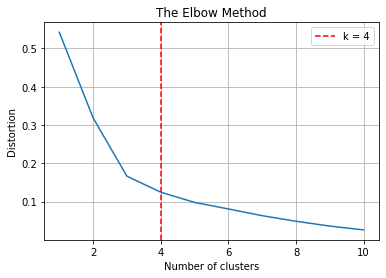

In [59]:
# plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color = 'red', label = "k = "+str(k))
ax.set(title = 'The Elbow Method', xlabel = 'Number of clusters', ylabel = "Distortion")
ax.legend()
ax.grid(True)
plt.show

#### Based on the elbow method we can try k = 4 in the K-Means algorithm below  

In [60]:
k = 4
model = cluster.KMeans(n_clusters = k, init='k-means++')
X = tot_venues[["Latitude", "Longitude"]]

In [61]:
# clustering
venue_X = X.copy()
venue_X["Cluster"] = model.fit_predict(X)

In [62]:
# find real centroids 
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,venue_X.drop("Cluster", axis=1).values)
venue_X["centroids"]=1
for i in closest:
    venue_X["centroids"].iloc[i] = 1

/Users/Priya/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [63]:
# add clustering info to the venues dataset
clust_venues = tot_venues
clust_venues[["cluster", "centroids"]] = venue_X[["Cluster", "centroids"]]
clust_venues.head(5)

,Venue_name,Category,Latitude,Longitude,Address,Cat,Cat_id,cluster,centroids
0,Berry Creek Country Club,"[(Golf Course, 4bf58dd8d48988d1e6941735)]",30.706772,-97.670761,"Georgetown, TX 78628, United States",Golf Course,4bf58dd8d48988d1e6941735,2,1
1,SUBWAY,"[(Sandwich Place, 4bf58dd8d48988d1c5941735)]",30.704855,-97.656179,301 State Highway 195 Ste 115 (Suite 115 Shell...,Sandwich Place,4bf58dd8d48988d1c5941735,2,1
2,Shell,"[(Gas Station, 4bf58dd8d48988d113951735)]",30.704655,-97.655968,"301 State Highway 195 Ste 105, TX 78633, Unite...",Gas Station,4bf58dd8d48988d113951735,2,1
3,the quarry at berry crerk country club,"[(Restaurant, 4bf58dd8d48988d1c4941735)]",30.706281,-97.670318,"Georgetown, TX, United States",Restaurant,4bf58dd8d48988d1c4941735,2,1
4,Berry Creek Food Mart,"[(Convenience Store, 4d954b0ea243a5684a65b473)]",30.704619,-97.655997,"301 State Highway 195, TX 78633, United States",Convenience Store,4d954b0ea243a5684a65b473,2,1


Now that we have the clusters and centroids, let's visualize it on the map 

In [64]:
x, y = "Latitude", "Longitude"
color="cluster"
popup="Venue_name"
marker = "centroids"
data = clust_venues.copy()

# create color column
clust_list = sorted(list(clust_venues[color].unique()))
clr_list = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(clust_list))]
data["color"] = data[color].apply(lambda x: clr_list[clust_list.index(x)])

# initialize the map 
map_clust = folium.Map(location=[ggtwn_lat, ggtwn_lon], zoom_start=11)
folium.Marker([ggtwn_lat, ggtwn_lon], popup='Georgetown').add_to(map_clust)
# add points
data.apply(lambda row: folium.CircleMarker(location=[row[x], row[y]], popup=row[popup], color=row["color"],fill=True,
                                          radius=3).add_to(map_clust), axis=1)

map_clust

Adding the housing communities to the clusters to see which clusters/communities are favorable for investing

In [65]:
# add new communities to the map as blue circles 
for lat, lng, label in zip(com_ggtwn.latitude, com_ggtwn.longitude, com_ggtwn.Communities):
    folium.Circle(
        [lat, lng],
        radius=1500,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.1
        ).add_to(map_clust)
    
    icon = folium.DivIcon(html=label)
    folium.Marker([lat, lng], icon=icon).add_to(map_clust)
    
    
#display map
map_clust

The above clustering analysis gives a good geographical distribution of the venues with respect to the housing communities. As expected and as we can see from the map above, the downtown area has the most number of venues and may not have any new commercial properties. The cluster around 'Sun city' area to the north west of Georgetown downtown has quite a few venues too; whereas the clusters to the west, south west and south east of downtown have a very few venues and will be a great palces to invest in. This analysis gives an overview of potential areas to invest in commercial real-estate. Now we can further analyze the data  based on the kind of property/business one is interested to invest in, such as a Pharmacy or pizza place. 

In [66]:
#  Top 25 venues 
cat_gen = tot_venues.groupby("Cat")["Cat"].count()
cat_gen.sort_values(ascending = False).head(25)

Cat
Fast Food Restaurant          11
Pizza Place                   10
Sandwich Place                 9
Restaurant                     8
Pharmacy                       7
American Restaurant            6
Mexican Restaurant             6
Salon / Barbershop             6
Gas Station                    5
Park                           5
Cosmetics Shop                 5
Convenience Store              5
Burger Joint                   5
Construction & Landscaping     5
Gym                            4
Seafood Restaurant             4
Department Store               4
Home Service                   4
Asian Restaurant               4
Video Store                    4
Ice Cream Shop                 3
Golf Course                    3
Fried Chicken Joint            3
Chinese Restaurant             3
BBQ Joint                      3
Name: Cat, dtype: int64

In [67]:
# selecting venue categories that match "Pharmacy"
Pharmacy = tot_venues.loc[tot_venues["Cat"] == "Pharmacy"]
Pharmacy.head()

,Venue_name,Category,Latitude,Longitude,Address,Cat,Cat_id,cluster,centroids
31,Walgreens,"[(Pharmacy, 4bf58dd8d48988d10f951735)]",30.665034,-97.694464,"3204 Williams Dr, TX 78628, United States",Pharmacy,4bf58dd8d48988d10f951735,0,1
52,Baylor Scott & White Pharmacy #202,"[(Pharmacy, 4bf58dd8d48988d10f951735)]",30.698815,-97.736472,"4945 Williams Dr, TX 78633, United States",Pharmacy,4bf58dd8d48988d10f951735,2,1
55,CVS pharmacy,"[(Pharmacy, 4bf58dd8d48988d10f951735)]",30.682133,-97.717388,"4426 Williams Dr (D. B. Wood), TX 78628, Unite...",Pharmacy,4bf58dd8d48988d10f951735,2,1
66,HebPharmacy-Georgetown,"[(Pharmacy, 4bf58dd8d48988d10f951735)]",30.681530,-97.720245,"4500 Williams Dr, TX 78633, United States",Pharmacy,4bf58dd8d48988d10f951735,2,1
131,Walmart Pharmacy,"[(Pharmacy, 4bf58dd8d48988d10f951735)]",30.645584,-97.684948,"620 S Interstate 35, TX 78628, United States",Pharmacy,4bf58dd8d48988d10f951735,0,1


In [68]:
pizza = tot_venues.loc[tot_venues["Cat"] == "Pizza Place"]
pizza.head()

,Venue_name,Category,Latitude,Longitude,Address,Cat,Cat_id,cluster,centroids
21,Little Caesars Pizza,"[(Pizza Place, 4bf58dd8d48988d1ca941735)]",30.668288,-97.695667,"3415 Williams Dr Ste 105, TX 78628, United States",Pizza Place,4bf58dd8d48988d1ca941735,0,1
24,Domino's Pizza,"[(Pizza Place, 4bf58dd8d48988d1ca941735)]",30.667196,-97.694888,"104 Western Trl Ste 101, TX 78628, United States",Pizza Place,4bf58dd8d48988d1ca941735,0,1
28,Papa Murphy's,"[(Pizza Place, 4bf58dd8d48988d1ca941735)]",30.666202,-97.695358,"3316 Williams Dr Ste 105, TX 78628, United States",Pizza Place,4bf58dd8d48988d1ca941735,0,1
51,Yaghi's Pizzeria,"[(Pizza Place, 4bf58dd8d48988d1ca941735)]",30.682191,-97.720356,"4500 Williams Dr (Williams Drive), TX 78633, U...",Pizza Place,4bf58dd8d48988d1ca941735,2,1
132,Papa John's Pizza,"[(Pizza Place, 4bf58dd8d48988d1ca941735)]",30.646828,-97.677935,"601 N Austin Ave, TX 78626, United States",Pizza Place,4bf58dd8d48988d1ca941735,0,1


In [69]:
bus_ggtwn = folium.Map(location=[ggtwn_lat, ggtwn_lon], zoom_start=11)
folium.Marker([ggtwn_lat, ggtwn_lon], popup='Georgetown').add_to(bus_ggtwn)

# Mark the communities with blue circles
for lat, lng, label in zip(com_ggtwn.latitude, com_ggtwn.longitude, com_ggtwn.Communities):
    folium.Circle(
        [lat, lng],
        radius=1500,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.1
        ).add_to(bus_ggtwn)
    
# Mark Pharmacies as red cirlces
for i, C in Pharmacy.iterrows() :
    lat = C["Latitude"]; lon = C["Longitude"]; name = C["Venue_name"]
    color = 'red'
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_child(folium.Popup(name)).add_to(bus_ggtwn)

# Mark Pizza places as green circles
for i, p in pizza.iterrows() :
    lat = p["Latitude"]; lon = p["Longitude"]; name = p["Venue_name"]
    color = 'green' 
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_child(folium.Popup(name)).add_to(bus_ggtwn)


bus_ggtwn

Although KMeans clustering gave an overview of upcoming geographical locations to investment in. If we dig deeper to look at a particular kind of business we can see that there a quite a few areas that one can invest in as shown in the above map.  

## Results and Discussion <a name="results"></a>

From the results we can see that the 18 new housing communities cover pretty much the entire Georgetown area except for the downtown. To keep the analysis comprehensive venues from the downtown area are also extracted using Foursquare. Based on the venue data, it can be concluded that although there is no new housing community cooming up in the downtown area, it is still very much a good location to invest in, based on the nature of the business. We concluded this by looking at the 'Coffee Shops' data of the area and indentified the locations where there are not many Coffee shops and one can easily invest in one. This can be extended to any other business. 

A similar analysis of the new hosusing communities was carried out. If we look at the housing communities on the map, there are overlaps in the circles. Due to lack of venues Foursquare results were null for smaller radii, for this reason most of the analysis is carried out with a radius of 1500. These overlaps were prominent in the communities to the south east of Georgetown but did not affect the venue listings. A total of 263 venues were found for all the 18 communities put together which were then segmented into 4 clusters based on the K-Mean clustering. These clusters when overlapped with housing communities clearly show which communities has sparsely populated venues and which communities are near densly populated venues. The venue data is sorted based on the category of businesses and top 25 categories are listed. It gives a fair overview of kind of businesses available in the area. As an example, couple of business categories, pharmacy and pizza place are selected and the locations of the venues are shown on the map. Based on their locations it can seen that there is a lot of potential to invest in Georgetown as it is one of Williamson county's fastest growing town. 

## Conclusion <a name="conclusion"></a>

In conclusion, the areas around the new housing communities of Georgetown has a very good growth potential for real-estate investment of any kind. If someone is looking for an opportunity to invest in land, commercial establishment or  a retail space, this analysis can be helpful in identifying the potential geographical locations without having to visit Georgetown. Based on the results it can be concluded that the area around the communities west and south of Georgetown have a lot of potential to grow. The "Sun city' north of Georgetown has more venues compared to other clusters but based the nature of the business there might be opportunities there as well. All in all Georgetown is a good place to invest if someone is looking to invest in construction as there are quite a few new housing communities but not so many supporting commercial businesses.

The another aspect that can enhance this analysis is office locations such as doctor's office, insurance etc., which could not be obtained from Foursquare. Going forward to make the analysis more complete this information can be added. Another aspect that will make this analysis more meaningful is to add the commercial real estate listing data. So an investor can see the listings of available commercial spaces along with the businesses that are already present in a given area. Unfortunately this data was not available free and a lot of real estate companies make it illegal to scrape their websites. This is another piece that will improve this study. 